### Author: Kubam Ivo 
### Purpose: Algorithms For Big Data Project
### Date: 25/3/2021

# Eliminate points

In [1]:
# generate points
import random

def generate_points(n):
    data = [(random.randint(1,100),random.randint(1,100)) for x in range(n)] 
    print('Stream contains', len(data), 'data points')
    return data

#stream = generate_points(1000)



In [2]:
# Class for algorithm 1: Eliminate-points (m)
import random
import numpy as np
class Eliminate:
    
    """ Class to generate m skyline points from n stream data """
    def __init__(self, m=3):
        self._m = m
        self._x = self._m * 24

    
    #reservoir sampling

    def reservoir_sample(self, stream):
        """Receives the sample generated data points and does to a reservoir sampling to return selected points """
        k = int(24*self._m)
        if k <  len(stream):
            reservoir = [stream[i] for i in range(k)]
        else:
            reservoir = stream[:]

        for i in range(k,len(stream)):
            j = random.randint(1,i)
            if j < k:
                reservoir[j] = stream[i]
        print(len(reservoir), 'points have been sample from the main stream into the reservoir sample')
        return reservoir

    # dominant points

    def dominate(self, stream, reservoir_point):
        """ Reeceives the selected points from reservoir sampling and replace any if dominated by a point in the stream data """
        dominant_point = reservoir_point [:]
        n = 0
        for i in range(len(stream)):
            sampled_elem = random.choice(dominant_point)

            x1, y1 = sampled_elem
            x2, y2 = stream[i]

            if (x2 >= x1 and y2 >= y1) and (x2 > x1 or y2 > y1):
                n += 1
                #print('Point', stream[i], 'dominates and replaces', sampled_elem)        
                dominant_point[dominant_point.index(sampled_elem)] = stream[i]
        print('There were ', n, ' replacement done between the main stream and reservoir sample')
        print('Preview of skyline points ')
        print(dominant_point[:10], '...')
        return dominant_point

    # Final pass
    def remove_point_stream(self, stream, skyline_points):
        """Delete from stream data all points dominated by points skyline points or points found in skyline points"""
        output_stream = []
        n = 0
        for point in stream:
            if point not in skyline_points:
                n +=1
                output_stream.append(point)

        n = 0
        for point in skyline_points:
            x2, y2 = point
        
            for elem in output_stream:
                x1, y1 = elem
                if (x2 >= x1 and y2 >= y1) and (x2 > x1 or y2 > y1):
                    output_stream.remove(elem)
                    n +=1
        print(n, 'points in the main stream were remove eihter because they were dominated or found in the skyline list')
        print(len(output_stream), ' points are left in the stream')
        return output_stream
    
    


In [27]:
import time
import math
#varying sample sizes

sample = []
exec_time = []
for size in range(1000,10000,1000):
    stream = generate_points(size)
    sample.append(size)
    tic = time.perf_counter()  # starts the timer
    m = 3
    test = Eliminate(m)
    reservoir_pts = test.reservoir_sample(stream)
    sky_pts = test.dominate(stream,reservoir_pts)
    output_stream = test.remove_point_stream(stream,sky_pts)
    print(output_stream)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time.append(toc - tic)
    print()

Stream contains 1000 data points
72 points have been sample from the main stream into the reservoir sample
There were  88  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(66, 96), (48, 83), (78, 64), (97, 9), (68, 98), (68, 81), (92, 73), (92, 82), (89, 78), (60, 92)] ...
921 points in the main stream were remove eihter because they were dominated or found in the skyline list
3  points are left in the stream
[(14, 100), (52, 100), (100, 84)]
Execution time:  0.02045829999997295

Stream contains 2000 data points
72 points have been sample from the main stream into the reservoir sample
There were  121  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 99), (98, 79), (91, 72), (98, 93), (93, 98), (100, 64), (99, 92), (100, 92), (96, 95), (85, 59)] ...
1915 points in the main stream were remove eihter because they were dominated or found in the skyline list
1  points are left in the stream
[(1, 100)]
E

Text(0.5, 1.0, 'Stream size vs Execution time')

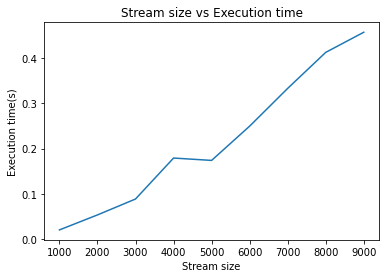

In [30]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(sample, exec_time)
plt.xlabel('Stream size')
plt.ylabel('Execution time(s)')
plt.title("Stream size vs Execution time")

In [33]:
import time
import math
#varying m, the number of skyline points

sample = []
exec_time = []
size = 10000
for m in range(1,11):
    stream = generate_points(size)
    sample.append(m)
    tic = time.perf_counter()  # starts the timer
    test = Eliminate(m)
    reservoir_pts = test.reservoir_sample(stream)
    sky_pts = test.dominate(stream,reservoir_pts)
    output_stream = test.remove_point_stream(stream,sky_pts)
    print(output_stream)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time.append(toc - tic)
    print()

Stream contains 10000 data points
24 points have been sample from the main stream into the reservoir sample
There were  77  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(94, 99), (100, 96), (100, 94), (99, 98), (80, 100), (96, 100), (100, 98), (100, 90), (97, 93), (95, 100)] ...
9960 points in the main stream were remove eihter because they were dominated or found in the skyline list
1  points are left in the stream
[(99, 99)]
Execution time:  0.5295529999998507

Stream contains 10000 data points
48 points have been sample from the main stream into the reservoir sample
There were  131  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(94, 97), (94, 98), (100, 80), (96, 77), (77, 99), (96, 84), (100, 100), (100, 89), (97, 98), (78, 99)] ...
9917 points in the main stream were remove eihter because they were dominated or found in the skyline list
4  points are left in the stream
[(49, 100), (94, 100), (

Text(0.5, 1.0, 'Number of skyline points (m) vs Execution time')

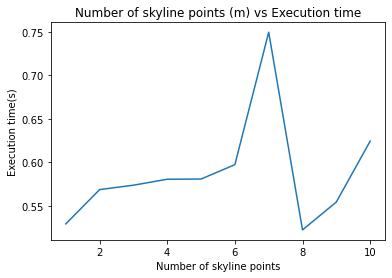

In [34]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(sample, exec_time)
plt.xlabel('Number of skyline points')
plt.ylabel('Execution time(s)')
plt.title("Number of skyline points (m) vs Execution time")


### Lemma Two is proven as the number of points left in the stream is always at most the input stream size divided by 4 or atleast 3n/4 points are eliminated from the main stream

# Streaming RAND

Algorithm 2 (Streaming RAND): 
    1: Let n be the number of points in the input stream. 
    Let m' = 1. 
    2: while the input stream is not empty do: 
    3: let n' be the current number of points in the stream 
    4: Call eliminate points (m'log(nlogn))
    5: If more than n'/2 points are left in the stream, m' = 2 m'
    6: end while 
    Remark: In case the stream cannot be changed, we do not have to actually delete points from stream. 
    We only keep the skyline points found so far and consider only points in the stream that is not dominated by any found skyline points. 
        

In [35]:
import math
m_prime = 1
sample = []
exec_time = []
for size in range(1000,10000,1000):
    stream = generate_points(size)
    n = len(stream)
    sample.append(size)
    tic = time.perf_counter()  # starts the timer
    while n > 0:
        parameter = int(m_prime*math.log(n*math.log(n)))
        test = Eliminate(parameter)
        reservoir_pts = test.reservoir_sample(stream)
        sky_pts = test.dominate(stream,reservoir_pts)
        output_stream = test.remove_point_stream(stream,sky_pts)
        n_prime = len(output_stream)
        if n_prime > n/2:
            m_prime = 2*m_prime
            n = n_prime
        else:
            print(output_stream)
            print('Current value of m-prime is ',m_prime,"\n")
            toc = time.perf_counter()
            print("Execution time: ", toc - tic)
            exec_time.append(toc - tic)
            break


    


Stream contains 1000 data points
192 points have been sample from the main stream into the reservoir sample
There were  130  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(99, 60), (100, 87), (85, 87), (89, 70), (5, 87), (100, 94), (46, 40), (89, 100), (82, 81), (58, 49)] ...
813 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
[]
Current value of m-prime is  1 

Execution time:  0.0216517000001204
Stream contains 2000 data points
216 points have been sample from the main stream into the reservoir sample
There were  199  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(97, 57), (100, 44), (87, 70), (98, 88), (87, 83), (58, 3), (87, 97), (61, 9), (79, 45), (98, 81)] ...
1772 points in the main stream were remove eihter because they were dominated or found in the skyline list
1  points are left in the stream
[(100, 92)

Text(0.5, 1.0, 'Stream size vs Execution time')

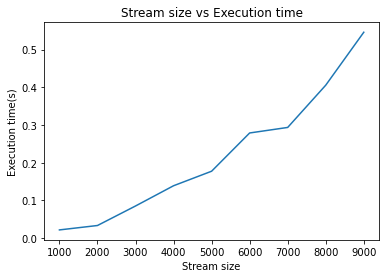

In [36]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(sample, exec_time)
plt.xlabel('Stream size')
plt.ylabel('Execution time(s)')
plt.title("Stream size vs Execution time")

### Proofs lemma 6: E.g with n = 10000, The probability that the algorithm repeats until m-prime ≥ 2m is at most 1/10000 = . This implies that, with probability (1 − 1/10000)=0.999, the stream will be empty before m-prime is increased again. 

# Fixed Window

In [38]:
# varying the stream size
import time
import math

sample = []
exec_time = []
for size in range(10000,100000,10000):
    stream = generate_points(size)
    w = int(0.01 * len(stream)) # getting the number of points using window size of 0.01.
    output_stream = stream[:] # Assuming output and stream data at thesame at the beginning
    n = len(output_stream)

    sample.append(size)
    tic = time.perf_counter()  # starts the timer
    # simple running the elimate algorithm with w/24
    while n > 0:
        test = Eliminate(w/24)
        reservoir_pts = test.reservoir_sample(output_stream)
        sky_pts = test.dominate(output_stream,reservoir_pts)
        output_stream = test.remove_point_stream(output_stream,sky_pts)
        n = len(output_stream)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time.append(toc - tic)
    print("\n")
    

Stream contains 10000 data points
100 points have been sample from the main stream into the reservoir sample
There were  209  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(96, 71), (85, 98), (100, 87), (74, 99), (80, 100), (67, 99), (100, 85), (98, 94), (100, 89), (97, 94)] ...
9829 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
Execution time:  0.6082029999997758


Stream contains 20000 data points
200 points have been sample from the main stream into the reservoir sample
There were  458  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(92, 100), (85, 97), (100, 97), (94, 99), (98, 88), (99, 91), (85, 100), (90, 99), (100, 93), (79, 100)] ...
19562 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
Execution time:  1.9001318999999

Text(0.5, 1.0, 'Stream size vs Execution time for fixed w = 0.01')

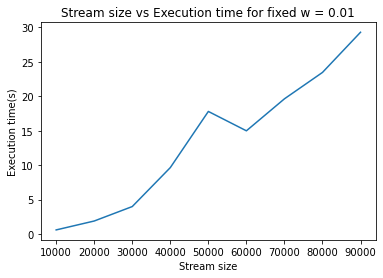

In [39]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(sample, exec_time)
plt.xlabel('Stream size')
plt.ylabel('Execution time(s)')  
plt.title("Stream size vs Execution time for fixed w = 0.01")

In [51]:
# varying the window size
import time
import math

size = 10000
sample = []
exec_time = []
for w in [0.001, 0.005,0.01,0.05,0.1]:
    stream = generate_points(size)
    sample.append(w)
    w = int(w * len(stream)) # getting the number of points using window size of 0.01.
    output_stream = stream[:] # Assuming output and stream data at thesame at the beginning
    n = len(output_stream)

    
    tic = time.perf_counter()  # starts the timer
    # simple running the elimate algorithm with w/24
    while n > 0:
        test = Eliminate(w/24)
        reservoir_pts = test.reservoir_sample(output_stream)
        sky_pts = test.dominate(output_stream,reservoir_pts)
        output_stream = test.remove_point_stream(output_stream,sky_pts)
        n = len(output_stream)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time.append(toc - tic)
    print("\n")

Stream contains 10000 data points
10 points have been sample from the main stream into the reservoir sample
There were  44  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(96, 96), (94, 100), (99, 97), (100, 99), (80, 100), (97, 100), (94, 100), (100, 92), (99, 100), (99, 100)] ...
9954 points in the main stream were remove eihter because they were dominated or found in the skyline list
33  points are left in the stream
10 points have been sample from the main stream into the reservoir sample
There were  6  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 81), (98, 6), (100, 94), (100, 81), (100, 93), (62, 98), (100, 93), (100, 87), (100, 97), (81, 78)] ...
23 points in the main stream were remove eihter because they were dominated or found in the skyline list
1  points are left in the stream
1 points have been sample from the main stream into the reservoir sample
There were  0  replacement done b

Text(0.5, 1.0, 'window size vs Execution time for fixed stream size = 10000')

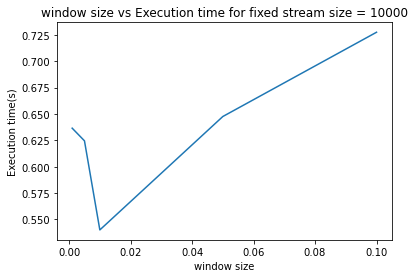

In [52]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(sample, exec_time)
plt.xlabel('window size')
plt.ylabel('Execution time(s)')  
plt.title("window size vs Execution time for fixed stream size = 10000")